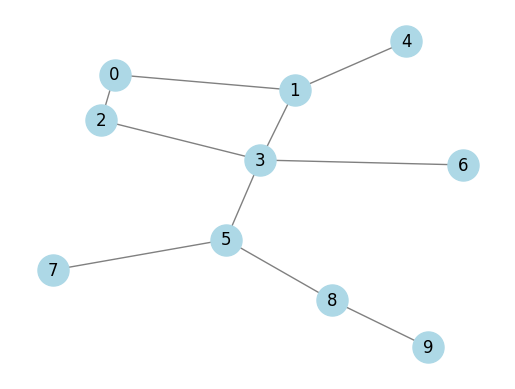

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create a graph
G = nx.Graph()

# Add edges (graph structure based on your adjacency list)
edges = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 3), (3, 5), (3, 6), (5, 7), (5, 8), (8, 9)]
G.add_edges_from(edges)

# DFS Algorithm
def dfs(graph, start_node):
    visited = {node: False for node in graph.nodes()}
    dfs_order = []

    def dfs_visit(node):
        visited[node] = True
        dfs_order.append(node)

        for neighbor in graph.neighbors(node):
            if not visited[neighbor]:
                dfs_visit(neighbor)

    dfs_visit(start_node)
    return dfs_order

# Generate DFS order
dfs_order = dfs(G, 0)

# Initialize plot
fig, ax = plt.subplots()
pos = nx.spring_layout(G)  # Positioning the nodes

# Draw the initial graph
nx.draw(G, pos, ax=ax, node_color='lightblue', with_labels=True, node_size=500, edge_color='gray')

# Animation function
def update(num):
    ax.clear()
    nx.draw(G, pos, ax=ax, node_color='lightblue', with_labels=True, node_size=500, edge_color='gray')
    
    # Highlight nodes and edges that are visited
    current_node = dfs_order[num]
    nx.draw_networkx_nodes(G, pos, nodelist=[current_node], node_color='green', node_size=700, ax=ax)
    
    # Draw all visited edges up to this point
    edges_to_draw = [(dfs_order[i], dfs_order[i+1]) for i in range(num) if (dfs_order[i], dfs_order[i+1]) in G.edges()]
    nx.draw_networkx_edges(G, pos, edgelist=edges_to_draw, edge_color='green', width=3, ax=ax)

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(dfs_order), interval=1000, repeat=False)

# Display the animation
plt.show()
